<a href="https://colab.research.google.com/github/saumya1484/Handwriting/blob/main/ML_BrainTumorPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BrainTumorData.csv to BrainTumorData (2).csv


In [ ]:
import pandas as pd 
pd.set_option('display.width',1000)
pd.set_option('display.max_column',40)
pd.set_option('precision',2)


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['BrainTumorData.csv']),index_col=False)
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0      842302         M        17.99         10.38          122.80     1001.0             0.12              0.28        3.00e-01             1.47e-01           0.24                    0.08       1.09        0.91          8.59   153.40       6.40e-03        4.90e-02      5.37e-02           1.59e-02         0.03              6.19e-03         25.38          17.33           184.60      2019.0              0.16               0.67             0.71                  0.27           

In [ ]:
data.shape

(569, 33)

In [ ]:
print("data shape=", data.shape,"\n\n")

print(data.describe())

data shape= (569, 33) 


             id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
count  5.69e+02       569.00        569.00          569.00     569.00           569.00            569.00          569.00               569.00         569.00                5.69e+02     569.00      569.00        569.00   569.00       5.69e+02        5.69e+02        569.00           5.69e+02     5.69e+02              5.69e+02        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00  

In [ ]:
data['diagnosis']=data['diagnosis'].apply(lambda x: '1' if x== 'M' else '0')
data=data.set_index('id')
del data['Unnamed: 32']
print("After Deletion of  'Unnamed: 32' column\n",data)

After Deletion of  'Unnamed: 32' column
          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

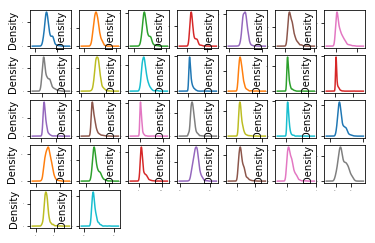

In [ ]:
data.plot(kind='density',subplots=True,
 
          layout=(5,7),sharex=False,legend=False,fontsize=1)
plt.show()


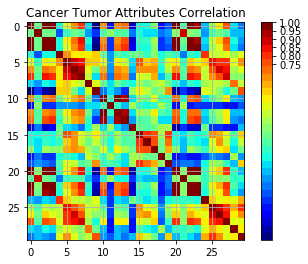

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet',30)
cax = ax1.imshow(data.corr(),interpolation= "none",cmap=cmap)
ax1.grid(True)
plt.title('Cancer Tumor Attributes Correlation')
fig.colorbar(cax,ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis',axis=1).values

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
model.fit(X_train,Y_train)
predictdY=model.predict(X_test)
result = model.score(X_test,Y_test)
print("Accuracy=",(result*100),"%%")

Accuracy= 92.02127659574468 %%


In [ ]:
model = LogisticRegression()
num_folds = 10
kfold = KFold(n_splits=num_folds)
results = cross_val_score(model,X,Y,cv=kfold)
print("KFold Accuracy=",results.mean())


KFold Accuracy= 0.950814536340852


In [ ]:
res = list(zip(X_test,predictdY))
print(res)


[(array([1.082e+01, 2.421e+01, 6.889e+01, 3.616e+02, 8.192e-02, 6.602e-02,
       1.548e-02, 8.160e-03, 1.976e-01, 6.328e-02, 5.196e-01, 1.918e+00,
       3.564e+00, 3.300e+01, 8.263e-03, 1.870e-02, 1.277e-02, 5.917e-03,
       2.466e-02, 2.977e-03, 1.303e+01, 3.145e+01, 8.390e+01, 5.056e+02,
       1.204e-01, 1.633e-01, 6.194e-02, 3.264e-02, 3.059e-01, 7.626e-02]), '0'), (array([1.775e+01, 2.803e+01, 1.173e+02, 9.816e+02, 9.997e-02, 1.314e-01,
       1.698e-01, 8.293e-02, 1.713e-01, 5.916e-02, 3.897e-01, 1.077e+00,
       2.873e+00, 4.395e+01, 4.714e-03, 2.015e-02, 3.697e-02, 1.110e-02,
       1.237e-02, 2.556e-03, 2.153e+01, 3.854e+01, 1.454e+02, 1.437e+03,
       1.401e-01, 3.762e-01, 6.399e-01, 1.970e-01, 2.972e-01, 9.075e-02]), '1'), (array([2.227e+01, 1.967e+01, 1.528e+02, 1.509e+03, 1.326e-01, 2.768e-01,
       4.264e-01, 1.823e-01, 2.556e-01, 7.039e-02, 1.215e+00, 1.545e+00,
       1.005e+01, 1.700e+02, 6.515e-03, 8.668e-02, 1.040e-01, 2.480e-02,
       3.112e-02, 5.037e-03, 2.